- want cooccurance plots for each MCM
- want want to cluster them etc. see notes
- want them for same MCM but different sizes

In [1]:
import numpy as np
import os
import json
import sys
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

sys.path.append("../")
import src.plot as myplot
import seaborn as sns


In [2]:
import importlib
import src.plot as myplot
importlib.reload(myplot)

<module 'src.plot' from '/Users/paulhosek/PycharmProjects/mcm/MCM_classifier/Classifier_1/classifier/bin/../src/plot.py'>

In [10]:
# lets first load some example MCM
data_path = "../OUTPUT/sample_sizes"
fname = "MCMs.json"
# sample_sizes = [10,100,500,1000,5421]
# sample_sizes = np.geomspace(10,5421, 10,dtype=int)
sample_sizes = np.append(np.arange(10, 5421, 100), 5421)
samples = {}
for sample_size in sample_sizes:

        with open(os.path.join(data_path,str(sample_size), fname), "r") as f:
                samples[sample_size] = json.load(f)

In [11]:
sample_sizes

array([  10,  110,  210,  310,  410,  510,  610,  710,  810,  910, 1010,
       1110, 1210, 1310, 1410, 1510, 1610, 1710, 1810, 1910, 2010, 2110,
       2210, 2310, 2410, 2510, 2610, 2710, 2810, 2910, 3010, 3110, 3210,
       3310, 3410, 3510, 3610, 3710, 3810, 3910, 4010, 4110, 4210, 4310,
       4410, 4510, 4610, 4710, 4810, 4910, 5010, 5110, 5210, 5310, 5410,
       5421])

In [4]:
# def create_cooccurance_matrix(mcm):
#     """
#     Create a co-occurrence matrix based on the given MCMs.

#     :param MCMs: A list or nparray with strings of nr_pixel elements that are either 0 or 1.
#     :type MCMs: list or np.ndarray
#     :return: The ordered co-occurrence matrix.
#     :rtype: np.ndarray
#     """
#     mcm = np.genfromtxt(mcm, delimiter=1, dtype=int)
#     pairs = np.argwhere(mcm == 1).T
#     nr_pixels = len(pairs[0])
#     matrix = np.zeros((nr_pixels, nr_pixels))

#     # fill the groupings into the co-occurrence matrix
#     for icc in np.unique(pairs[0]):
#         pixels = pairs[1][pairs[0] == icc]
#         matrix[np.ix_(pixels, pixels)] = 1
        
#     # cluster MCMs together


#     return matrix

# def do_cluster(matrix, via_matrix=None):
#     """
#     Perform hierarchical clustering on a given matrix.
#     Can provide via_matrix to base the clustering of "matrix" on the dendrogram of "via_matrix". 

#     :param matrix: The input matrix for clustering.
#     :type matrix: numpy.ndarray
#     :param via_matrix: Optional matrix to base the clustering of "matrix" on. Clustering will be performed on "via_matrix" and applied to "matrix".
#     :type return_dendro: numpy.ndarray
#     :return: The clustered matrix
#     :rtype: numpy.ndarray
#     """
    
#     if via_matrix is None:
#         via_matrix = matrix

#     linkage = sch.linkage(via_matrix, method='average')
#     dendrogram = sch.dendrogram(linkage, no_plot=True)
#     return matrix[:, dendrogram['leaves']][dendrogram['leaves']]

In [12]:
samples.keys()

dict_keys([10, 110, 210, 310, 410, 510, 610, 710, 810, 910, 1010, 1110, 1210, 1310, 1410, 1510, 1610, 1710, 1810, 1910, 2010, 2110, 2210, 2310, 2410, 2510, 2610, 2710, 2810, 2910, 3010, 3110, 3210, 3310, 3410, 3510, 3610, 3710, 3810, 3910, 4010, 4110, 4210, 4310, 4410, 4510, 4610, 4710, 4810, 4910, 5010, 5110, 5210, 5310, 5410, 5421])

In [13]:
# Cooccurance matrix for MCM 0
coo_5421 = myplot.create_cooccurance_matrix(samples[5421][0])
mcm_0 = [myplot.create_cooccurance_matrix(samples[i][0]) for i in samples.keys()]

In [14]:
my_sum = myplot.do_cluster(np.sum(mcm_0,axis=0), coo_5421)

In [72]:
cmap = myplot.cmap_to_gray("Black", reverse=True)

In [73]:
len(mcm_0)

56

In [75]:
# plt.imshow(mcm_0[-1])
# plt.imshow(np.sum(mcm_0,axis=1))

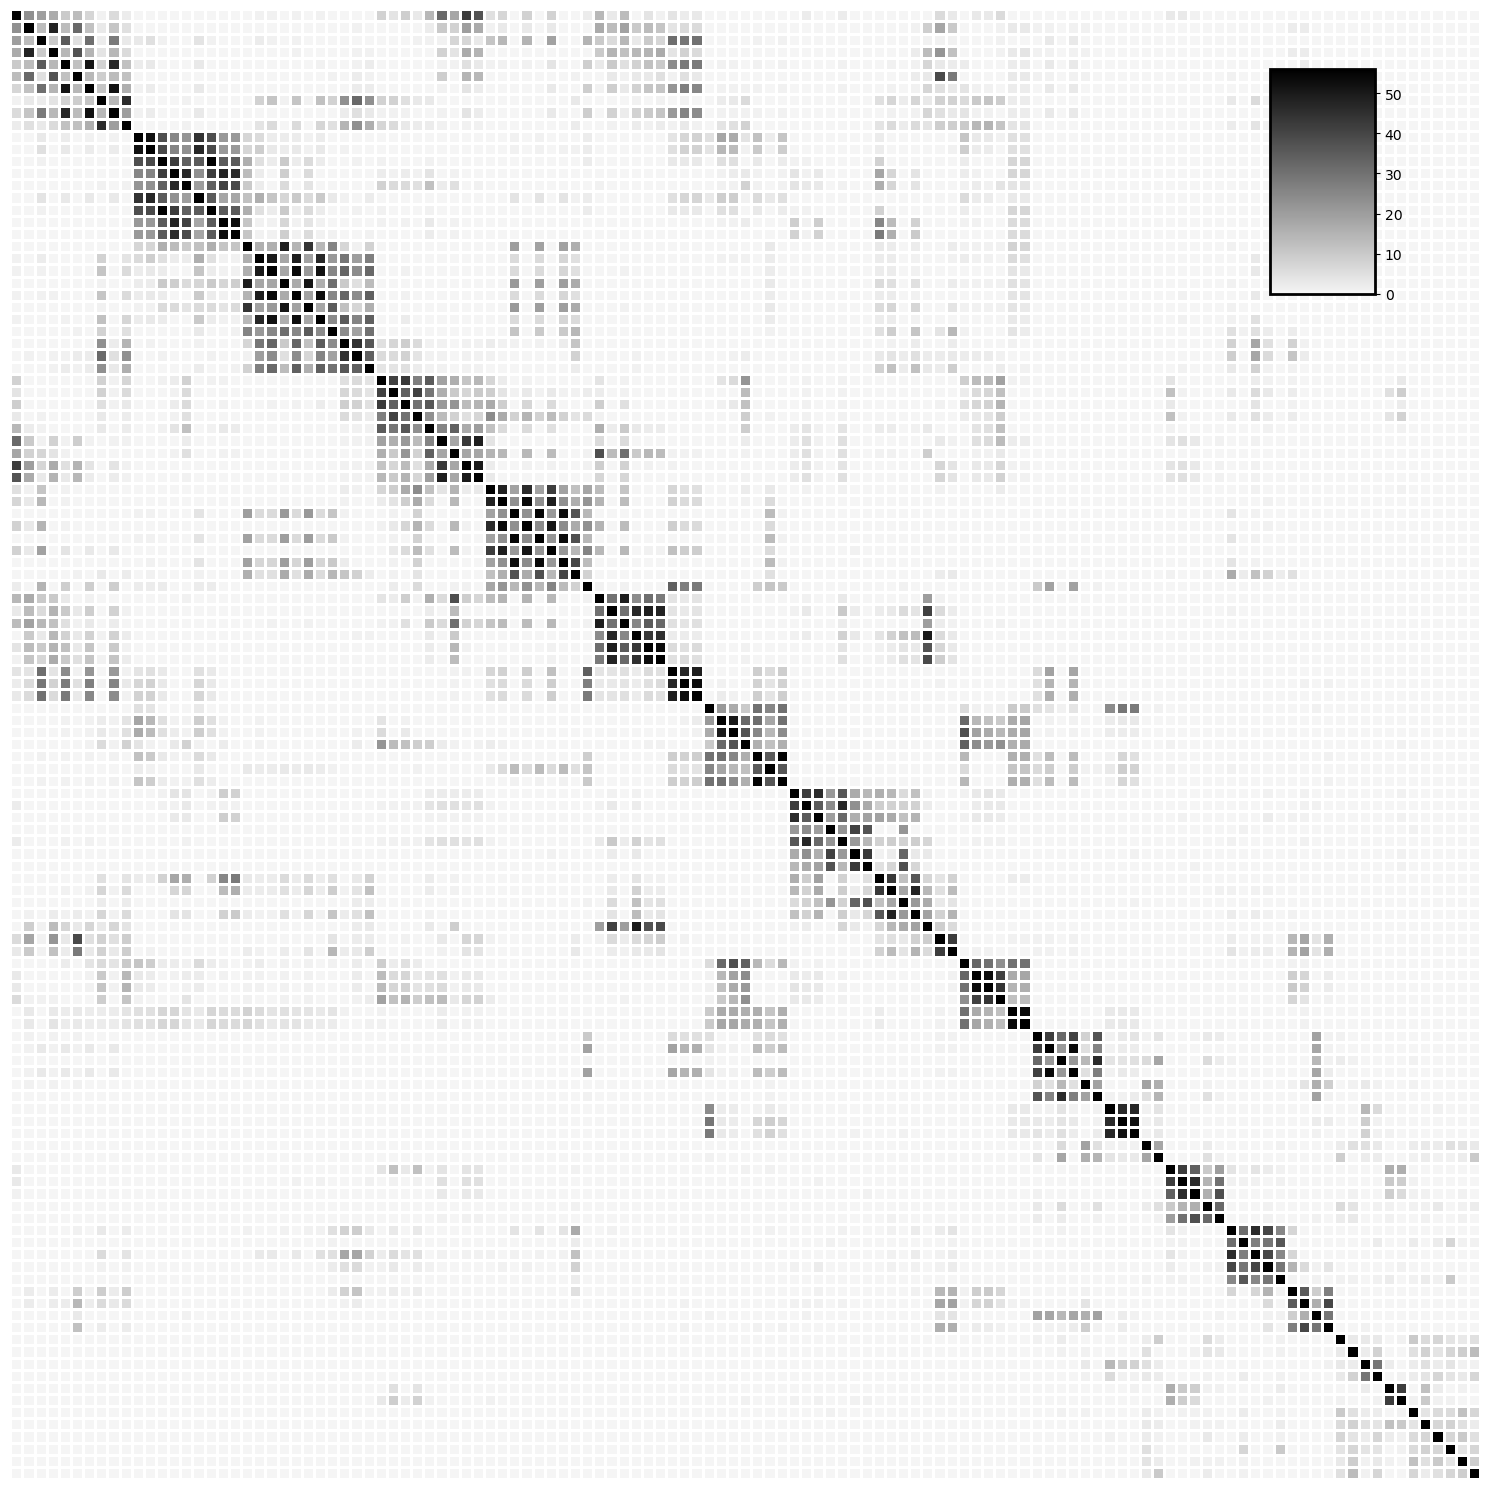

In [76]:

g = sns.clustermap(my_sum, cmap=cmap, linewidth=.99,
                    edgecolor="white", 
                    dendrogram_ratio=(1e-10,1e-10), # This line 
                    figsize=(15,15),
                    xticklabels=False,
                    yticklabels=False,
                    row_cluster=False,
                    col_cluster=False,
                    cbar=True,
                    cbar_pos=(0.85, 0.8, 0.07, 0.15)  # Set the colorbar position to the top right corner
                    )
# g.ax_row_dendrogram.remove()
# g.ax_col_dendrogram.remove()
# g.ax_heatmap.set_facecolor("gray")

# g.cax.set_visible(False)
# g.ax_cbar.set_title("")

g.ax_cbar.tick_params(axis='x', length=10)
for spine in g.ax_cbar.spines:
    g.ax_cbar.spines[spine].set_color('black')
    g.ax_cbar.spines[spine].set_linewidth(2)

plt.savefig("test.png")

In [97]:
# calcualte overlap between sample cluastering and final clustering
# -> how many are already in the right cluster
# mcm_0

res = [np.sum(np.logical_and(i, mcm_0[-1])) for i in mcm_0]

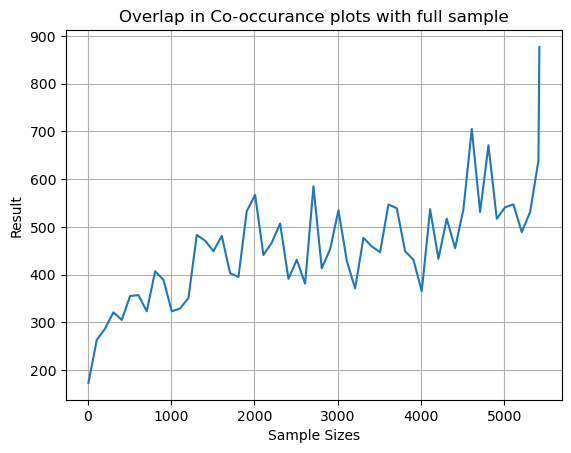

In [100]:
plt.plot(sample_sizes, res)
plt.xlabel('Sample Sizes')
plt.ylabel('Result')
plt.title("Overlap in Co-occurance plots with full sample")
plt.grid(True)
plt.show()

------------------------------

In [ ]:
test_mcm = test_MCMs[0]
test_mcm = np.genfromtxt(test_mcm,delimiter=1,dtype=int)


idx_pairs = np.argwhere(test_mcm==1).T
cooocurance_matrix = np.zeros((121,121))

cooocurance_matrix[idx_pairs[0],idx_pairs[1]] = 1
cooocurance_matrix[idx_pairs[1],idx_pairs[0]] = 1

plt.imshow(cooocurance_matrix)

mcm = np.array(["11000", "00111"],dtype=str)

mcm